In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import scipy.integrate as itg
import scipy.special as scp


In [2]:
# Calculating the exccentricity
# where,
#
#   E_k = E/k  E:energy , k:wave vector
#   b: impact parameter

def excc(E_k,b):
    """
    _____________________________
         RUTHERFORD SCATTERING
    
    Calculates the exccentricity
    _____________________________
    
     |  Parameters
     |  ----------
     |  E_k = E/k ---> E: Energy , k: wave vector
     |  b: impact parameter    
     |
     |
     |  Returns
     |  ----------
     |  e: exccentricity
    
    """
    return np.sqrt(1.0+(2.0*b*E_k)**2)

############################################################

# Calculating the closest distance for each b
# where,
#
#   e: exccentricity
#   E_k = E/k  E:energy , k:wave vector
#   b: impact parameter
#   pm: +1 or -1 (atractive or repulsive potential)

def rmin(e,E_k,b,pm):
    """
    ______________________________________________
                 RUTHERFORD SCATTERING
    
    Calculates the clossest distance to the target
    ______________________________________________
    
     |  Parameters
     |  ----------
     |  e: exccentricity
     |  E_k = E/k ---> E: Energy , k: wave vector
     |  b: impact parameter    
     |  pm: can be +1 (atractive potential) or -1 (repulsive potential)
     |
     |  Returns
     |  ----------
     |  rmin: the clossest distance to the target
    
    """    
    
    
    return (2.0*E_k*b**2)/(pm*e-1.0)

############################################################

# Calculating the position of the beam particles. The equation used for it is equivalent to setting 
# the reference point theta=0 at the distance of closest approach,
# where,
# 
#
#   exccentricity: exccentricity
#   rminimum: the closest distance for each b to the target
#   theta: angle for each position
#   pm: +1 or -1 (atractive or repulsive potential)
    

def r(exccentricity,rminimum,theta,pm):    
    """
    
    ____________________________________________________________
                        RUTHERFORD SCATTERING
    
    Calculates the distance of the beamed particle to the target
    ____________________________________________________________
    
     |  Parameters
     |  ----------
     |  e: exccentricity
     |  rminimum: the closest distance to the target
     |  theta: the angle     
     |  pm: can be +1 (atractive potential) or -1 (repulsive potential)
     |
     |  Returns
     |  ----------
     |  r: the distance of the beamed particle to the target
    
    """       
    return ((pm-exccentricity)/(pm-exccentricity*np.cos(theta)))*rminimum

############################################################

# Calculating the integrand of the deflection function
# where,
# 
#
#   pos: position of the beam particle (r)
#   E_k = E/k  E:energy , k:wave vector
#   b: impact parameter

def integrand(r,E_k,i):
    """
    
    ___________________________________________________
                    RUTHERFORD SCATTERING
    
    Calculates the integrand of the deflection function
    ___________________________________________________
    
     |  Parameters
     |  ----------
     |  r: the distance of the beamed particle to the target
     |  E_k = E/k ---> E: Energy , k: wave vector
     |  i: impact parameter    
     |  
     |
     |  Returns
     |  ----------
     |  r: the distance to the target
    
    """      
    return (i/(r**2*((np.sqrt(1.0-1.0/(E_k*r)-(i/r)**2)))))


def plot(posx,posy,posz,ind1,trail):
    """
    _____________________________________________________________________________________
                                     CLASSICAL SCATTERING 
    _____________________________________________________________________________________
    
     |  Parameters
     |  ----------
     |  posx : an array that contains the position in x for each time  
     |  posy : an array that contains the position in y for each time   
     |  posz : an array that contains the position in z for each time  
     |  ind1 : the dimension of these arrays 
     |  trail :  draws the trail of the particle. Options ----> "yes" or "no"
     |
     |
     |  Returns
     |  ----------
     |  Plots the particle´s trail
    
    """ 
    
    if trail=="yes":
        mybox=vp.box(pos=(0.5,0,0), length=0.1, height=0.1, width=0.001,color=vp.color.green)
        beamed_particle=vp.sphere(pos=(posx[0],posy[0],posz[0]),radius=0.1,color=vp.color.cyan,make_trail=True)
        target=vp.sphere(pos=(0,0,0),radius=0.2,color=vp.color.yellow)
            
        for i in range(ind1):
            vp.rate(1000)
            beamed_particle.pos=(posx[i],posy[i],posz[i])
            
        for j in range(18):
            vp.sphere(pos=(posx[ind1-1],np.cos(2.0*np.pi*(j+1)*20.0/360.0)*posy[ind1-1]-posz[ind1-1]*np.sin(2.0*np.pi*(j+1)*20.0/360.0),posy[ind1-1]*np.sin(2.0*np.pi*(j+1)*20.0/360.0)+posz[ind1-1]*np.cos(2.0*np.pi*(j+1)*20.0/360.0)),radius=0.1,color=vp.color.cyan)

    else:
        mybox=vp.box(pos=(0.5,0,0), length=0.1, height=0.1, width=0.001,color=vp.color.green)
        beamed_particle=vp.sphere(pos=(posx[0],posy[0],posz[0]),radius=0.1,color=vp.color.cyan)
        target=vp.sphere(pos=(0,0,0),radius=0.02,color=vp.color.yellow)
            
        for i in range(ind1):
            vp.rate(1000)
            beamed_particle.pos=(posx[i],posy[i],posz[i])
        for j in range(18):
            vp.sphere(pos=(posx[ind1-1],np.cos(2.0*np.pi*(j+1)*20.0/360.0)*posy[ind1-1]-posz[ind1-1]*np.sin(2.0*np.pi*(j+1)*20.0/360.0),posy[ind1-1]*np.sin(2.0*np.pi*(j+1)*20.0/360.0)+posz[ind1-1]*np.cos(2.0*np.pi*(j+1)*20.0/360.0)),radius=0.01,color=vp.color.cyan)

            
def spherical_to_cartesians(r,theta,phi,N):
    """
    __________________________________________________________
    Changes your coordinate system from spherical to cartesian
    __________________________________________________________
    
     |  Parameters
     |  ----------
     |  r : array(r1,r2,r3,...,rN) 
     |  theta : array(theta1,theta2,theta3,...,thetaN)    
     |  phi : array(phi1,phi2,phi3,...,phiN)
     |  N : dimension of the arrays 
     |
     |
     |
     |  Returns
     |  ----------
     |  posx,posy,posz : the positions in x,y and z for each particle 
    
    """   
    posx,posy,posz=np.zeros(N),np.zeros(N),np.zeros(N)
    
    for i in range(N):
        posx[i]=r[i]*np.sin(theta[i])*np.cos(phi[i])
        posy[i]=r[i]*np.sin(theta[i])*np.sin(phi[i])
        posz[i]=r[i]*np.cos(theta[i])
        
    return (posx,posy,posz)

#                                    Classical and Quantum Scattering

# Introduction

The nature of this project is totally pedagogic. As I was finishing the career I thought about contributing my grain of sand in physics by helping those students who are starting now. Most of the concepts learned in physics are not very intuitive and in most of the cases some examples are needed to understand them. From my experience, visualizing them was the most difficult part. So, in order to avoid these problems I find it useful teaching them in a interactive way, in a way in which the students could participate in their learning process.

In this project we are going to see how the classical and quantum scattering can be explained in a interactive way. Due to the nature of this project I find it useful to program it in a open source language, as it is Python. In this way, anybody who is interested in this topic will be able to enjoy it.


## 1. Classical scattering
 
This chapter reviews the classical theory describing the scattering of a beamed particle from a target particle. In order to make it interactive, for each explanation or graphic will be some changeable paramaters.

## 1.1. Deflection function

To explain what the deflection function is , the easiest way is to ilustrate it. In the figure 1 we can see how a poyectile coming from the infinite approaches a target. Taking the incident direction to be horizontal, the initial vertical distance b from the target is called the impact parameter. Once the particle has passed through the interaction area, it is scattered to a deflection angle $\Theta$ at infinity.

![title](Scattering1.jpg)
$$Figure\hspace{0.1in}1$$

One could think that for each value of b corresponds an unique $\Theta$. The truth is that in some cases different values of b finish with the same angle. Usually, the value of b cannot be determined experimentally, so a relationship between b and $\Theta$ is needed. Thus, $\Theta$(b), the deflection function is expressed by 


$$\Theta(b) = \pi - 2 \int_{r_{min}}^\infty \frac{b}{r^{2}\sqrt{1-\frac{V(r)}{E}-\frac{b^{2}}{r^{2}}}}\mathrm{d}r\hspace{0.5in}(1.1)$$

The deflection function needs to be calculated numerically. However, in the case of the Rutherford scattering the solution is analitic. In fact, the result is the one described for the kepler´s orbits, from where we get the following relation between b and $\Theta$:

$$b=\frac{k}{2E}cot(\frac{\Theta}{2})$$

Also, we find out useful the following expressions for the exccentricity and $r_{min}$:

$$ e = \sqrt{1+\frac{4E^{2}b^{2}}{k^{2}}} \hspace{0.2in}
    r_{min} = \frac{2Eb^{2}}{k(\pm e-1)}$$
    
To demonstrate that the implementation works correctly we are going to compare the analitic and numerical solutions of the Rutherford scattering. We will introduce some changeable parameters so that the user could play and interact with them. Using ipywidgets this task becomes very easy. The result is ilustrated in the following graphic,

In [3]:
def bvalues(b):
    return(b.value)
def deflec(choose,b1,b2):
    
    
    impact_parameter=np.linspace(b1,b2,100)
    deflection,deflection_theory=np.zeros(100),np.zeros(100)
    ind1=0
    for i in impact_parameter:
    
        e=excc(E_k,i)                                # As r is in function of e and rmin, firstly, we calculate them...
        r_minimum=rmin(e,E_k,i,1.0)
        I,error=itg.quad(integrand,r_minimum,np.inf,args=(E_k,i)) #this integral is used to calculate the deflection function
    
        deflection[ind1]=np.pi-2.0*I
        deflection_theory[ind1]=2.0*np.arctan(1.0/(2.0*i*E_k))
        ind1+=1

    labels=choose
    plt.figure()
    if choose=="Numerical":
        
        plt.plot(impact_parameter,deflection)
    elif choose=="Analitic":
        
        plt.plot(impact_parameter,deflection_theory,color="C1")
    else:
        labels=["Numerical","Analitic"]
        plt.plot(impact_parameter,deflection,"b+")
        plt.plot(impact_parameter,deflection_theory,color="C1")
        
    plt.title("Deflection angle vs b")
    plt.ylabel("${\Theta}$ (deflection angle)")
    plt.xlabel("b (atomic units)")
    plt.legend(labels, loc='upper right')

    plt.show()

    
    
##################### Deflection function #####################
choose=widgets.ToggleButtons(options=["Numerical","Analitic","both"])
b1=widgets.FloatSlider(min=0,max=2,step=0.01,value=0.01,description='b1')
b2=widgets.FloatSlider(min=0,max=2,step=0.01,value=1,description='b2')
E_k=1.0

q=widgets.interactive(deflec,choose=choose,b1=b1,b2=b2)
display(q)

interactive(children=(ToggleButtons(description='choose', options=('Numerical', 'Analitic', 'both'), value='Nu…

Here we can see that the numerical and analitic solutions are equal. In this way, we could asure that for any given potential we could calculate totally accurately its deflection function. Besides, we can see how as b increasing the deflection function decreases which is something totally intuitive, if the distance between the projectile and the target increases the interaction will be of shorter time.

Now we are going to see the differences between two famous potentials. Those are,

- *__Rutherford potential:__*

$$ V(r)=\frac{k}{r} $$


- *__Plum-pudding potential:__*

$$ V(r)=\left\{\begin{matrix}
\frac{Z}{2R}(\frac{r^{2}}{R^{2}}-3), \hspace{0.3in} if \hspace{0.1in} r\leq R \hspace{0.05in},  \\
-\frac{Z}{r}, \hspace{0.8in} if \hspace{0.1in}r> R\hspace{0.05in}. 
\end{matrix}\right. $$


In this way, we will also see the differences between Thomson´s and Rutherford´s atomic models. In 1909 Ernest Rutherford directed the Geiger-Marsden experiment which suggested that the Thomson´s plum pudding model of the atom was incorrect. This experiment was based on hiting a thin gold foil with beamed $\alpha$ particles. These ones where defrected to different directions with different deflection angles. 

-----

----

To see the differences between these two models, we are going to plot them. Each one will have different parameters that can be manipulated by you. In case of not knowing what values do you need, dont worry! The program will provide you the default values that are used in daily Physical problems. 

-----

In [4]:
def RK4(velocit,step,time,pos,cte):
    """
    __________________________________________________
                    RUNGE-KUTTA METHOD
    
    Calculates the (x,y,Vx,Vy) vector of the next step
    __________________________________________________
    
     |  Parameters
     |  ----------
     |  vector = (x,y,vx,vy) of the previous step
     |  t: time    
     |  cte: the constant of the rutherford potential
     |
     |  Returns
     |  ----------
     |  result=(vx,vy,ax,ay) of the previous step
    
    """
    k1=step*velocit(pos,time,cte)
    k2=step*velocit(pos+k1/2.0,time+step/2.0,cte)
    k3=step*velocit(pos+k2/2.0,time+step/2.0,cte)
    k4=step*velocit(pos+k3,time+step,cte)
    
    return (pos+k1/6.0+k2/3.0+k3/3.0+k4/6.0)

def cartesian_to_spherical(vector):
    """
    __________________________________________________________
    Changes your coordinate system from cartesian to spherical
    __________________________________________________________
    
     |  Parameters
     |  ----------
     |  vector = (x,y,z,vx,vy,vz) 
     |      
     | 
     |
     |  Returns
     |  ----------
     |  new_vector=(r, theta, phi, r_velocity, theta_velocity, phi_velocity) 
    
    """
    new_vector=np.zeros(6)
    new_vector[0]=np.sqrt(vector[0]**2+vector[1]**2+vector[2]**2)
    new_vector[1]=np.arctan2(np.sqrt(vector[0]**2+vector[1]**2),vector[2])
    new_vector[2]=np.arctan2(vector[1],vector[0])
    new_vector[3]=((vector[0]*vector[3]+vector[1]*vector[4]+vector[2]*vector[5])/(new_vector[0]))
    new_vector[4]=((vector[2]*(vector[0]*vector[3]+vector[1]*vector[4]))-(vector[5]*(vector[0]**2+vector[1]**2)))/(((new_vector[0])**2)*np.sqrt(vector[0]**2+vector[1]**2))
    new_vector[5]=(vector[0]*vector[4]-vector[1]*vector[3])/(vector[0]**2+vector[1]**2)
    
    return (new_vector)
def vel_cartesian_to_spherical(vector):
    
    new_vector=np.zeros(3)
    new_vector[0]=((vector[0]*vector[3]+vector[1]*vector[4]+vector[2]*vector[5])/(new_vector[0]))
    new_vector[1]=new_vector[0]*((vector[2]*(vector[0]*vector[3]+vector[1]*vector[4]))-(vector[5]*(vector[0]**2+vector[1]**2)))/(((new_vector[0])**2)*np.sqrt(vector[0]**2+vector[1]**2))
    new_vector[2]=(new_vector[0]*np.sin(new_vector[1]))*(vector[0]*vector[4]-vector[1]*vector[3])/(vector[0]**2+vector[1]**2)
    
    return (new_vector)

def creating_position_array(x,by,bz,vx,vy,vz):
    """
    ________________________________________________
    Creates an array for the position anf velocities                
    ________________________________________________
    
     |  Parameters
     |  ----------
     |  x : position in x
     |  y : position in y   
     |  z : position in z
     |  vx : velocity in x
     |  vy : velocity in y
     |  vz : velocity in z 
     |
     |  Returns
     |  ----------
     |  array=(x,y,z,vx,vy,vz) 
    
    """
    array=np.zeros(3)
    array[0]=x
    array[1]=by
    array[2]=bz
 
    return (array)
def creating_velocity_array(vx,vy,vz):
    array=np.zeros(3)
    array[0]=vx
    array[1]=vy
    array[2]=vz
    return (array)

def create_array(x,y,z,vx,vy,vz):
    new_vector=np.zeros(6)
    new_vector[0]=x
    new_vector[1]=y
    new_vector[2]=z
    new_vector[3]=vx
    new_vector[4]=vy
    new_vector[5]=vz
    return (new_vector)

def spherical_to_cartesians(r,theta,phi,N):
    """
    __________________________________________________________
    Changes your coordinate system from spherical to cartesian
    __________________________________________________________
    
     |  Parameters
     |  ----------
     |  r : array(r1,r2,r3,...,rN) 
     |  theta : array(theta1,theta2,theta3,...,thetaN)    
     |  phi : array(phi1,phi2,phi3,...,phiN)
     |  N : dimension of the arrays 
     |
     |
     |
     |  Returns
     |  ----------
     |  posx,posy,posz : the positions in x,y and z for each particle 
    
    """   
    posx,posy,posz=np.zeros(N),np.zeros(N),np.zeros(N)
    
    for i in range(N):
        posx[i]=r[i]*np.sin(theta[i])*np.cos(phi[i])
        posy[i]=r[i]*np.sin(theta[i])*np.sin(phi[i])
        posz[i]=r[i]*np.cos(theta[i])
        
    return (posx,posy,posz)

def difeq_rutherford(vector,t,cte):
    """
    _________________________________________________________________________
    The differential equation of Rutherfords potential used in the RK4 Method
    _________________________________________________________________________
    
     |  Parameters
     |  ----------
     |  vector : an array that contains the position and velocities in a time t  
     |  t : time    
     |  cte : the rutherfords potential constant
     |   
     |
     |
     |
     |  Returns
     |  ----------
     |  new_vector : the velocities and accelerations in a time t  
    
    """ 

    new_vector=np.zeros(6)
    
    
    new_vector[0]=vector[3]
    new_vector[1]=vector[4]
    new_vector[2]=vector[5]
    new_vector[3]=(cte/(vector[0]**2))+vector[0]*((new_vector[1]**2)+(new_vector[2]**2)*((np.sin(vector[1]))**2))
    new_vector[4]=+(new_vector[2]**2)*np.sin(vector[1])*np.cos(vector[1])-((2.0*new_vector[0]*new_vector[1])/vector[0])
    new_vector[5]=-(2.0*vector[4]*vector[5]/np.tan(vector[1]))-(2.0*vector[3]*vector[5]/vector[0])
    
    return(new_vector)


def difeq_plum_pudding1(vector,t,cte):
    """
    _____________________________________________________________________________________
    The differential equation of Plum-puddings potential (for r<R) used in the RK4 Method
    _____________________________________________________________________________________
    
     |  Parameters
     |  ----------
     |  vector : an array that contains the position and velocities in a time t  
     |  t : time    
     |  cte : the rutherfords potential constant
     |   
     |
     |
     |
     |  Returns
     |  ----------
     |  new_vector : the velocities and accelerations in a time t  
    
    """ 
    new_vector=np.zeros(6)
    new_vector[0]=vector[3]
    new_vector[1]=vector[4]
    new_vector[2]=vector[5]
    new_vector[3]=(-cte*vector[0])+vector[0]*(vector[4]**2+vector[5]**2*(np.sin(vector[1]))**2)
    
    new_vector[4]=vector[5]**2*np.sin(vector[1])*np.cos(vector[1])-(2.0*vector[3]*vector[4]/vector[0])
    new_vector[5]=(-2.0*vector[3]*vector[5]/vector[0])-(2.0*vector[4]*vector[5]/np.tan(vector[1]))
    return(new_vector)

    
def difeq_plum_pudding2(vector,t,cte):
    """
    _____________________________________________________________________________________
    The differential equation of Plum-puddings potential (for r>R) used in the RK4 Method
    _____________________________________________________________________________________
    
     |  Parameters
     |  ----------
     |  vector : an array that contains the position and velocities in a time t  
     |  t : time    
     |  cte : the rutherfords potential constant
     |   
     |
     |
     |
     |  Returns
     |  ----------
     |  new_vector : the velocities and accelerations in a time t  
    
    """ 
    new_vector=np.zeros(6)
    new_vector[0]=vector[3]
    new_vector[1]=vector[4]
    new_vector[2]=vector[5]
    new_vector[3]=(-cte/(vector[0]**2))+vector[0]*(vector[4]**2+vector[5]**2*np.sin(vector[1]))
    new_vector[4]=((vector[5]**2)*np.sin(vector[1])*np.cos(vector[1]))-((2.0*vector[3]*vector[4])/vector[0])
    new_vector[5]=((-2.0*vector[3]*vector[5])/vector[0])-(2.0*vector[4]*vector[5]/np.tan(vector[1]))
    return(new_vector)

def plot(posx,posy,posz,potential,ind1,trail):
    """
    _____________________________________________________________________________________
                                     CLASSICAL SCATTERING 
    _____________________________________________________________________________________
    
     |  Parameters
     |  ----------
     |  posx : an array that contains the position in x for each time  
     |  posy : an array that contains the position in y for each time   
     |  posz : an array that contains the position in z for each time  
     |  ind1 : the dimension of these arrays 
     |  trail :  draws the trail of the particle. Options ----> "yes" or "no"
     |
     |
     |  Returns
     |  ----------
     |  Plots the particle´s trail
    
    """ 
    if potential=="rutherford":
        color1=vp.color.cyan
    else:
        color1=vp.color.white
    if trail=="yes":
        mybox=vp.box(pos=vp.vector(30.,0.,0.), length=1, height=50, width=50,color=vp.color.green)
        beamed_particle=vp.sphere(pos=vp.vector(posx[0],posy[0],posz[0]),radius=1.0,color=color1,make_trail=True,interval=1)
        target=vp.sphere(pos=vp.vector(0.,0.,0.),radius=1.0,color=vp.color.yellow)
            
        for i in range(ind1):
            vp.rate(1000)
            beamed_particle.pos=vp.vector(posx[i],posy[i],posz[i])
            
        for j in range(18):
            vp.sphere(pos=vp.vector(posx[ind1-1],np.cos(2.0*np.pi*(j+1)*20.0/360.0)*posy[ind1-1]-posz[ind1-1]*np.sin(2.0*np.pi*(j+1)*20.0/360.0),posy[ind1-1]*np.sin(2.0*np.pi*(j+1)*20.0/360.0)+posz[ind1-1]*np.cos(2.0*np.pi*(j+1)*20.0/360.0)),radius=1.0,color=color1)

    else:
        mybox=vp.box(pos=vp.vector(30,0,0), length=1, height=50, width=50,color=vp.color.green)
        beamed_particle=vp.sphere(pos=vp.vector(posx[0],posy[0],posz[0]),radius=1.0,color=color1)
        target=vp.sphere(pos=vp.vector(0,0,0),radius=1.0,color=vp.color.yellow)
            
        for i in range(ind1):
            vp.rate(1000)
            beamed_particle.pos=vp.vector(posx[i],posy[i],posz[i])
        for j in range(18):
            vp.sphere(pos=vp.vector(posx[ind1-1],np.cos(2.0*np.pi*(j+1)*20.0/360.0)*posy[ind1-1]-posz[ind1-1]*np.sin(2.0*np.pi*(j+1)*20.0/360.0),posy[ind1-1]*np.sin(2.0*np.pi*(j+1)*20.0/360.0)+posz[ind1-1]*np.cos(2.0*np.pi*(j+1)*20.0/360.0)),radius=1.0,color=color1)

            
def plot_random(posy,posz,deflection,limit): 
    
    fig=plt.figure()
    y=limit*np.tan(deflection)
    angle=np.linspace(0,360,360)
    posycircle,poszcircle=np.zeros(360),np.zeros(360)
    for i in range(360):
        posycircle[i]=y*np.cos(angle[i])
        poszcircle[i]=y*np.sin(angle[i])
    plt.plot(posycircle,poszcircle)
    plt.plot(posy, posz, "ro")
    
    
    plt.xlabel("y position (atomic units)")
    plt.ylabel("z position (atomic units)")
    plt.show()  
    fig.savefig("Random scattering")        
            

def plot_random2(posx,posy,posz,N):
    """
    _____________________________________________________________________________________
                                    CLASSICAL RANDOM SCATTERING 
    _____________________________________________________________________________________
    
     |  Parameters
     |  ----------
     |  posx : an array that contains the position in x for each particle  
     |  posy : an array that contains the position in y for each particle   
     |  posz : an array that contains the position in z for each particle  
     |  N : number of particles 
     |  
     |
     |  Returns 
     |  ----------
     |  Plot the random beamed particles in a (y,z) graphic 
    """ 
    mybox=vp.box(pos=(30,0,0), length=1, height=50, width=50,color=vp.color.green)
        
    for i in range(N):
        vp.sphere(pos=(posx[i],posy[i],posz[i]),radius=1.0,color=vp.color.cyan)

In [5]:
import vpython as vp
def update(choose):
    
    def rutherford(by,bz,vx,trail):
        cte=8e4
        x=-20.0
        vy=vz=0.0
        
        dimension=2000
        t=np.linspace(0.0,0.1999,dimension)
        h=(0.2-0.0)/float(dimension)
        posx,posy,posz,r,theta,phi=np.zeros(dimension),np.zeros(dimension),np.zeros(dimension),np.zeros(dimension),np.zeros(dimension),np.zeros(dimension)     

        position=create_array(x,by,bz,vx,vy,vz)
       
        position=cartesian_to_spherical(position)
        
        
        ind1=0
        while ((position[0]*np.sin(position[1])*np.cos(position[2]))<30.0) and (ind1<dimension):
            
            position=RK4(difeq_rutherford,h,t[ind1],position,cte)
            
            
            
            r[ind1]=position[0]
            theta[ind1]=position[1]
            phi[ind1]=position[2]
            ind1+=1
        
        
        posx,posy,posz=spherical_to_cartesians(r,theta,phi,dimension)
    
        plot(posx,posy,posz,"rutherford",ind1,trail)
        
        print("In the rutherford atomic model, we can see how the beamed particles interact with the nucleus at close distances. If we put closer distances the deflection will increase. This is due to the nucleus of the atom. Lets see what happens in the thomson´s atomic model")
        
       
    def plum_pudding(by,bz,vx,trail):
        x=-20.0
        
        Z=-79
        Radius=1.0
        vy=vz=0.0
        
        dimension=2000
        t=np.linspace(0.0,0.5999,dimension)
        h=(0.6-0.0)/float(dimension)
        posx,posy,posz,r,theta,phi=np.zeros(dimension),np.zeros(dimension),np.zeros(dimension),np.zeros(dimension),np.zeros(dimension),np.zeros(dimension)     

        position=create_array(x,by,bz,vx,vy,vz)
        position=cartesian_to_spherical(position)
        
        ind1=0
        while (position[0]*np.sin(position[1])*np.cos(position[2]))<30.0 and (ind1<dimension):
            if position[0]<Radius:
                position=RK4(difeq_plum_pudding1,h,t[ind1],position,Z/((Radius**3)))
                r[ind1]=position[0]
                theta[ind1]=position[1]
                phi[ind1]=position[2]
                ind1+=1
            else:
                position=RK4(difeq_plum_pudding2,h,t[ind1],position,Z)
                r[ind1]=position[0]
                theta[ind1]=position[1]
                phi[ind1]=position[2]
                ind1+=1
        
        
        posx,posy,posz=spherical_to_cartesians(r,theta,phi,dimension)
        
        plot(posx,posy,posz,"plum",ind1,trail)
        print("In this case, the particles are defrected but with an smaller angle. Of course this wasnt what Rutherford saw in his experiment, but yes it was what they expected. If we decrease the impact parameter we will see how due to the homogeneous structure of Thomson´s atomic model the particles are not even defrected. As a result, Rutherford found out that the atom is formed of a nucleus composed of protons and neutrons. Years later, Bohr came out with the definitive model for the atom which suggested that the electrons where orbiting around the nucleus.")   
    
   
    if choose=="Rutherford":
        by=widgets.FloatSlider(min=0.2,max=2,value=0.5,step=0.01,description="imp.para.y")
        bz=widgets.FloatSlider(min=0.2,max=2,value=0.5,step=0.01,description="imp.para.z")
        vx=widgets.FloatSlider(min=0,max=2000,value=600.0,description="velocity in x")
        trail=widgets.ToggleButtons(options=['yes', 'no'],value="yes",description='Trail')
        w=widgets.interactive(rutherford,by=by,bz=bz,vx=vx,trail=trail)
            
            
    elif choose=="Plum-pudding":
        by=widgets.FloatSlider(min=0.2,max=2,value=0.5,description="imp.para.y")
        bz=widgets.FloatSlider(min=0.2,max=2,value=0.5,description="imp.para.z")
        vx=widgets.FloatSlider(min=0,max=2000,value=600.0,description="velocity in x")
        trail=widgets.ToggleButtons(options=['yes', 'no'],value="yes",description='Trail')
        w=widgets.interactive(plum_pudding,by=by,bz=bz,vx=vx,trail=trail)
        
        
    
    
    display(w)

print("Choose the following classical scattering:")    
r=widgets.ToggleButtons(options=['Rutherford', 'Plum-pudding'],description='',disabled=False)
q=widgets.interactive(update,choose=r)
m=1.0

display(q)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Choose the following classical scattering:


interactive(children=(ToggleButtons(description='choose', options=('Rutherford', 'Plum-pudding'), value='Ruthe…

We can see how for Rutherford's potential at small distances the particles are defrected almost backward. Whereas, in plum-pudding potential the deflection decreases at small distances. This was the evidence that Rutherford saw in his experiment to understand that the plum-pudding model was totally incorrect. In essence, at distances near to radius of the nucleus, the beamed particles interact heavily with the nucleus. Thus, the nucleus , as Rutherford said \cite{rutherford}, is composed of neutrons and protons concentrated in the center of the atom. 

# 1.1.2. Rainbow and Glory scattering

This are two cases that can be seen in the plum-pudding scattering. When the projectile does not have enough energy to move through the interaction area at small impact parameters, the particle is deflected backward with $\theta\approx\pi$. In this case , with increasing b the scattering angles decreases. 
\\
\vspace{0.1in}
However, if the particle has enough energy to penetrate the interaction area the result is quiet different. With incresing b, firstly, we see how the scattering angle also does. As b further increases, the time the particle spends on the interaction area decreases, and therefore the scattering angle $\theta$ also does. In this case, the maximum scattering angle reached by the particles beam is called the __rainbow angle__.

On the other hand, we have the glory scattering, which is shown generally for attractive potentials. It is based particularly in the effect a particle produces when is rejected with a deflection angle near $\pm\pi$. These angles produce an infinite cross section. The latter is known as the glory scattering.

## 1.2. Cross section

The reaction rates measured in scattering experiments, and the energy spectra and angular distributions of the reactions between the beam particles and the targets gives information about the dynamics of them. 

We imagine placing particle detectors where the beam particles are no more interacting with the target. We measure the number of particles (dN) captured by the detector subtending a solid angle, d$\Omega$. This number is proportional to the beam flux I. It is common to introduce the following: 

$$\sigma(\Omega)  = \frac{number\hspace{0.05in} of\hspace{0.05in} particles\hspace{0.05in} scattered\hspace{0.05in} into\hspace{0.05in} \theta \hspace{0.05in}and\hspace{0.05in} \theta+d\theta}{beam\hspace{0.05in} particles\hspace{0.05in} per\hspace{0.05in} unit\hspace{0.05in} area\hspace{0.05in} \cdot \hspace{0.05in} solid\hspace{0.05in} angle}= \frac{1}{I}\frac{dN}{d\Omega}$$ 

as the cross section, which is the probability of a particle being scattered to the angle $\theta$. The latter can also be calculated theorically. To put in practice this definition we will calculate first the last position of all the beamed particles that will have starting random positions $\in$ (r1,r2) and angle $\in$ $(\theta_{1},\theta_{2})$. Then, we only have to number how many of them are in the resulting solid angle, which is in terms of b (the impact parameter). The particles we are going to beam are electrons. It is true that in Rutherford's experiment they were $\alpha$ particles. In fact, these are their values:


$$ In\hspace{0.1in} atomic \hspace{0.1in} units \hspace{0.1in} \rightarrow m_{\alpha}=7294.28\hspace{0.1in} m_{e} $$

Also,

$$ q_{1}=2e$$

On the other hand, the target will have an optional parameter , Z, the atomic number of the atom. The default value will be Z=79 which is the atomic number of Au.

-----

In [7]:
def random(choose):
    import random
    def rutherford(target,Energy,r1,r2,N):
        print("calculating...")
        
        r,theta,phi=np.zeros(N),np.zeros(N),np.zeros(N)
        position=np.zeros(6)
        ind1=0
        dimension=2000
        t=np.linspace(0.0,1.999,dimension)
        h=(2.0-0.0)/float(dimension)
        x=-10.0
        q2=target
        
        q1=1.0
            
        m=1.0
           
        vx,vy,vz=np.sqrt(2.0*Energy*q1*q2/m),0.0,0.0
       
       
            
        cte=q1*q2/m
        while ind1<N:
            
            
            radio=random.uniform(r1, r2)
            angle2=random.uniform(0,360)
            position[0]=x
            position[1]=radio*np.cos(2.0*np.pi*angle2/360.0)
            position[2]=radio*np.sin(2.0*np.pi*angle2/360.0)
            position[3]=vx
            position[4]=vy
            position[5]=vz
            position=cartesian_to_spherical(position)
            ind2=0
            limit=2.0
            out="no"    
            while (ind2<dimension):
                position=RK4(difeq_rutherford,h,t[ind2],position,cte)
                
                ind2+=1
                
            r[ind1]=position[0]
            theta[ind1]=position[1]
            phi[ind1]=position[2]
            ind1+=1
            
        
        posx,posy,posz=spherical_to_cartesians(r,theta,phi,N)
        E_k=Energy
        e=excc(E_k,r1)                                
        r_minimum=rmin(e,E_k,r1,1.0)
        
        I,error=itg.quad(integrand,r_minimum,np.inf,args=(E_k,r1)) 
        deflection=np.pi-2.0*I
        limit=position[0]*np.sin(position[1])*np.cos(position[2])
        
        plot_random(posy,posz,deflection,limit)
        
         
    
    def plum_pudding(cte,Radius,Z,r1,r2,N):
        print("calculating...")
        r,theta,phi=np.zeros(N),np.zeros(N),np.zeros(N)
        position=np.zeros(6)
        ind1=0
        t=np.linspace(0.0,1.999,2000)
        h=(2.0-0.0)/2000.0
        x=-50.0
        vx,vy,vz=50.0,2.0,2.0
            
        while ind1<N:   
            
            radio=random.uniform(r1, r2)
            angle2=random.uniform(0,360)
            position[0]=x
            position[1]=radio*np.cos(2*np.pi*angle2/360)
            position[2]=radio*np.sin(2*np.pi*angle2/360)
            position[3]=vx
            position[4]=vy
            position[5]=vz
            position=cartesian_to_spherical(position)
            ind2
            while (position[0]*np.sin(position[1])*np.cos(position[2]))<30.0:
                
                if position[0]<Radius:
                    position=RK4(difeq_plum_pudding1,h,t[ind2],position,Z/(Radius**3))
                else:
                    position=RK4(difeq_plum_pudding2,h,t[ind2],position,Z)
                ind2+=1
                if ind2==2000:
                    out="yes"
                    break
            if out=="yes":
                r[ind1]=30.0
                theta[ind1]=np.pi/2.0
                phi[ind1]=0.0
                ind1+=1
                
            else:
                r[ind1]=position[0]
                theta[ind1]=position[1]
                phi[ind1]=position[2]
                ind1+=1
            
        
        posx,posy,posz=spherical_to_cartesians(r,theta,phi,N)
        plot_random(posy,posz)
        plot_random2(posx,posy,posz,N)
        
    
    
    if choose=="Rutherford":
        Energy=widgets.FloatSlider(min=0.5,max=2.0,value=1.0,step=0.1,description="Energy")
        target=widgets.IntSlider(min=1,max=100,value=79,description='Target´s charge',disabled=False)
        r1=widgets.FloatSlider(min=0,max=2,value=0.01,step=0.05,description="radius 1")
        r2=widgets.FloatSlider(min=0,max=2,value=0.10,step=0.05,description="radius 2")
        N=widgets.IntSlider(min=0,max=1000,value=100,description="Number of particles")
        w=widgets.interactive(rutherford,target=target,Energy=Energy,r1=r1,r2=r2,N=N)
            
            
    elif choose=="Plum-pudding":
        Energy=widgets.FloatSlider(min=0.5,max=2.0,value=1.0,step=0.1,description="Energy")
        target=widgets.IntSlider(min=1,max=100,value=79,description='Target´s charge',disabled=False)
        r1=widgets.FloatSlider(min=0,max=2,value=0.01,step=0.05,description="radius 1")
        r2=widgets.FloatSlider(min=0,max=2,value=0.10,step=0.05,description="radius 2")
        N=widgets.IntSlider(min=0,max=1000,value=100,description="Number of particles")
        w=widgets.interactive(rutherford,target=target,Energy=Energy,r1=r1,r2=r2,N=N)
        
    
          
    display(w)
        


print("Choose the following classical scattering:")    
r=widgets.ToggleButtons(options=['Rutherford', 'Plum-pudding'],description='',disabled=False)
q=widgets.interactive(random,choose=r)
m=1.0
display(q)

Choose the following classical scattering:


interactive(children=(ToggleButtons(description='choose', options=('Rutherford', 'Plum-pudding'), value='Ruthe…

The blue circle represents the theoretical position for the particles scattered from r1 position. If you put r1=r2 you will see how the computational solution agree with the solution get from the Eq (1.1). Now we could calculate the cross section just knowing how many of the particles have fallen in the solid angle surface. 

# 2. Quantum scattering


After explaining the classical scattering we now begin with the quantum scattering which is more appropiate at the atomic scale due to quantum phenomena. Between these two ways of seing the scattering theory there is a main important difference which is dealing with matter waves that obey the Schrödinger equation.

For scattering with $E>0$ and $V=0$ the most usual solution are plane waves. So,

$$\psi\rightarrow e^{ikz}+f(\theta)\frac{e^{ikr}}{r}$$

where, $k=\sqrt{2mE}/\hbar$ is the wave vector, $E>0$ energy, and m the mass of the particle. Furthermore, the factor $f(\theta)$ is called the scattering amplitude. You may have noticed that the wave number k is the same for both parts due to we are considering the scattering to be elastic. Once, we know what we are dealing with lets focus on the scattering cross section, which is represented by

$$
    \sigma(\Omega)=\mid f (\theta)\mid^{2}$$

Making a comparison with classical scattering, scattering amplitude is to quantum scattering as the deflection function is to classical scattering.

## 2.1. Partial waves

Decomposing the incident waves into partial waves is an useful and effective method to calculate the scattering amplitude and, hence, the quantum cross section. For this purpose we may start by transforming our problem into spherical coordinates. Thus, our wave function,


$$\psi(r,\theta,\gamma)=\sum\limits_{l} R_{l}(r)Y_{lm}(\theta,\gamma)$$

To simplify this function we are going to separate its variables. On one hand, the angular solution is given by $P_{l}(cos\theta)$, the Legendre polynomials. Were we notice that the resulting wave function will be independet of $\gamma$ because of our freedom to choose $\vec{k}$ parallel to the z axis. So, the incident plane wave $e^{ikz}$ can be written as

$$e^{ikrcos(\theta)}=\sum\limits_{l=0}^{\infty}(2l+1)i^{l}j_{l}(kr)P_{l}(cos\theta)$$

where $j_{l}(kr)$ is the spherical Bessel function of the first kind. In case of having a nonzero potential we find out solutions like
$$
    \psi=\sum\limits_{l=0}^{\infty} (2l+1)i^{l}R_{l}(k,r)P_{l}(cos\theta)
$$
The $R_{l}(kr)$ satisfies the radial Schrödinger equation, and for $V=0$, $j_{l}(kr)$. The latter has asymptotic behavior and thats why we end up having the following expression for the scattering amplitude:
$$f(\theta)=\frac{1}{2ik}\sum\limits_{l=0}^{\infty}(2l+1)i^{l}P_{l}(cos\theta)(e^{2i\delta_{l}}-1)e^{-il\pi/2}\frac{e^{ikr}}{r}$$
where using $e^{-il\pi/2}=(-i^{l})$,
$$
    f(\theta)=\frac{1}{k}\sum\limits_{l=0}^{\infty}(2l+1)e^{i\delta_{l}}sin\delta_{l}P_{l}(cos\theta)
$$

Finally, the cross section is
$$
    \sigma(\theta)=\frac{1}{k^{2}}\mid\sum\limits_{l=0}^{\infty}(2l+1)e^{i\delta_{l}}sin\delta_{l}P_{l}(cos\theta)\mid^{2}
$$
Integrating this equation we can get the total cross section. Thus,
$$\sigma_{t}=\frac{4\pi}{k^{2}}\sum\limits_{l=0}^{\infty}(2l+1)sin^{2}\delta_{l}$$

## 2.2. Phase shifts calculation

Now we only have to know how to calculate phase shifts. Let us introduce an example to understand this question. In fact, we are going to phase sifts in scattering from a 1D potential. This is the potential we are going to be working with,

$$V(r)=\left\{\begin{matrix}\infty, \hspace{0.3in} if \hspace{0.1in} r\leq a \hspace{0.05in},  \\ 0, \hspace{0.3in} if \hspace{0.1in} r> a\hspace{0.05in}. 
\end{matrix}\right.
$$

As we already know, the wave function vanishes inside the sphere. However, outside $r>a$, the radial wave function is a solution for this case. Imposing continuity conditions at $r=a$ we get the following equation:

$$
tan\delta_{l}=\frac{j_{l}(ka)}{n_{l}(ka)}
$$

In [8]:
def choose(r):
    def adjust():
        kr=np.linspace(0,3*np.pi,100)
        result=np.zeros(100)

        plt.figure()
        for l in range(5):
            ind1=0
            ind2=0
            value=0.0
            for j in kr:
                result[ind1]=np.arctan(scp.spherical_jn(l,j)/scp.spherical_yn(l,j))
                ind1+=1
            ind1=0
            for k in result:
                if (abs(value-k)>np.pi/2.0):
                    ind2+=1
                result[ind1]=k-ind2*np.pi
                value=k
                ind1+=1
            plt.plot(kr,result)
        labels=["l=0","l=1","l=2","l=3","l=4"]    
        plt.title("Phase shifts")
        plt.ylabel("${\delta_{l}}$(phase shift)")
        plt.xlabel("ka (cte)")
        plt.legend(labels, loc='lower left')
        plt.show()
        
    def noadjust():
        kr=np.linspace(0,3*np.pi,100)
        result=np.zeros(100)

        plt.figure()
        for l in range(5):
            plt.plot(kr,np.arctan(scp.spherical_jn(l,kr)/scp.spherical_yn(l,kr)))
            
        labels=["l=0","l=1","l=2","l=3","l=4"]    
        plt.title("Phase shifts")
        plt.ylabel("${\delta_{l}}$(phase shift)")
        plt.xlabel("ka (cte)")
        plt.legend(labels, loc='upper left')
        plt.show()
        
    if r=="Without adjusting":
        noadjust()
    else:
        adjust()
        
r=widgets.ToggleButtons(options=['Without adjusting', 'Adjusted'],description='',disabled=False)
q=widgets.interactive(choose,r=r)
display(q)

interactive(children=(ToggleButtons(description='r', options=('Without adjusting', 'Adjusted'), value='Without…

Here we can see that with small energies the leader phase sift would be the one given by $l=0$. Hence, the lower angular momentum. Nevertheless, as the energy increases, higher momentum angular waves start to contribute to the total cross section. One of the main objectives of this project is to understand the differences between classical and quantum scattering. The latter can be seen by plotting the differential cross section for a hard sphere. Indeed, we have already seen the result for the quantum scattering in the previous section. For convinience we are only taking into account the contributions of some angular momentums in order to ilustrate some results in an easy way.

Thus, the differential cross section for $ka=0.01$ can be approximated by just taking the contribution of the lower angular momentum. Hence,

$$\sigma(\theta)=\frac{sin^{2}\delta_{0}}{k^{2}}$$

However, for $ka=1.0$ it is neccesary to include minimum one more angular momentum, the one given by the p-wave. So, the differential cross section becomes into

$$\sigma(\theta)=\frac{1}{k^{2}}[sin^{2}\delta_{0}+6cos(\delta_{0}-\delta_{1})sin\delta_{0}sin\delta_{1}cos\theta+9sin^{2}\delta_{1}cos^{2}\theta]$$

where, $P_{0}(cos\theta)=1$ and $P_{1}(cos\theta)=cos\theta$ have been used. On the other hand, the classical result is given by

$$\sigma(\theta)=\frac{a^{2}}{4}$$

The three results are ilustrated in the following graphic.

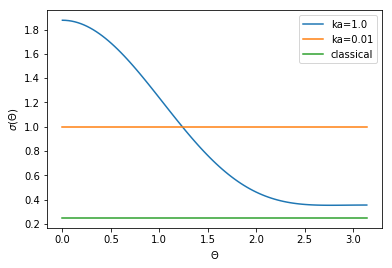

In [9]:
def highenergy(theta):
    delta0=np.arctan(scp.spherical_jn(0,1.0)/scp.spherical_yn(0,1.0))
    delta1=np.arctan(scp.spherical_jn(1,1.0)/scp.spherical_yn(1,1.0))
    return ((np.sin(delta0))**2+6.0*np.cos(delta0-delta1)*np.sin(delta0)*np.sin(delta1)*np.cos(theta)+9.0*(np.sin(delta1)*np.cos(theta))**2)
delta0=np.arctan(scp.spherical_jn(0,0.01)/scp.spherical_yn(0,0.01))
theta=np.linspace(0.0,np.pi,100)
low,high,classical=np.zeros(100),np.zeros(100),np.zeros(100)
ind1=0
for i in theta:
    high[ind1]=highenergy(i)
    low[ind1]=(np.sin(delta0)/0.01)**2
    classical[ind1]=1.0/4.0
    ind1+=1
labels=["ka=1.0","ka=0.01","classical"]    
plt.figure()
plt.plot(theta,high)
plt.plot(theta,low)
plt.plot(theta,classical)
plt.ylabel("${\sigma(\Theta)}$")
plt.xlabel("${\Theta}$")
plt.legend(labels, loc='upper right')
plt.show()

Here we can see for the lower energy that the differential cross section is isotropic as it has been calculated only with the s-wave. However, the contributions of other angular momentums would be extremely small and it ends up to be a good approximation. This does not happen with higher energies, with $ka=1.0$ for example. In this case, we get a maximum at forward angles. Moreover, something curious happens comparing it with the classical result, which is constant no matter what energy do we have. At backward angles they coincide almost with the same value due to the decreasement of de Broglie wavelenght  with the increasement of the energy. 

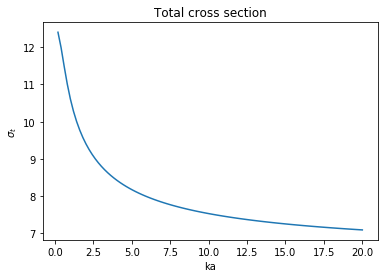

In [10]:
def crossquantum(energy):
    cross=0.0
    delta=1.0
    l=0
    while l<40:
        delta=np.arctan(scp.spherical_jn(l,energy)/scp.spherical_yn(l,energy))
        cross+=(2.0*l+1.0)*(np.sin(delta))**2
        l+=1
    return (cross*((4.0*np.pi)/(energy)**2))
                        
ka=np.linspace(0.,20.,100)
quantum,classical=np.zeros(100),np.zeros(100)
ind1=0
for i in ka:
    quantum[ind1]=crossquantum(i)
    classical[ind1]=np.pi
    ind1+=1
plt.figure()
plt.plot(ka,quantum)
#plt.plot(ka,classical)
plt.title("Total cross section")
plt.ylabel("${\sigma_{t}}$")
plt.xlabel("ka")
plt.show()

As we expected, we have a maximum at $ka=0$ which corresponds to the s-wave. Other energies have other angular momentums contributions and they do not have isotropic behaviours. So, the bigger the energy the smaller total cross section we get. 